In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dfa = pd.read_csv("accidents_2005_to_2007.csv")
dfb = pd.read_csv("accidents_2009_to_2011.csv")
dfc = pd.read_csv("accidents_2012_to_2014.csv")

In [3]:
df = pd.concat([dfa,dfb,dfc])

In [4]:
df["Time"] = df.Time.str[:-3]

In [5]:
for i in range(0,7):
    df.loc[df.Time =="0"+str(i) ,"Time"] = 3
for i in range(7,10):
    df.loc[df.Time =="0"+str(i) ,"Time"] = 1
df.loc[df.Time =="10" ,"Time"] = 1
df.loc[df.Time =="11" ,"Time"] = 1
for i in range(12,17):
    df.loc[df.Time ==str(i) ,"Time"] = 2
for i in range(17,21):
    df.loc[df.Time ==str(i) ,"Time"] = 1
for i in range(21,25):
    df.loc[df.Time ==str(i) ,"Time"] = 3


# Trafik akışının değişmesi kazaları nasıl etkiler?

In [6]:
filitre =['Accident_Index','Time',
       'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties','Day_of_Week',
       '1st_Road_Class', '1st_Road_Number', 'Speed_limit',
       '2nd_Road_Class',
       '2nd_Road_Number',
       'Weather_Conditions',
       'Urban_or_Rural_Area', 'Year']

df2 = df.reindex(columns=filitre)

In [7]:
df2 = df2.dropna()

In [8]:
df2.isnull().sum()

Accident_Index          0
Time                    0
Police_Force            0
Accident_Severity       0
Number_of_Vehicles      0
Number_of_Casualties    0
Day_of_Week             0
1st_Road_Class          0
1st_Road_Number         0
Speed_limit             0
2nd_Road_Class          0
2nd_Road_Number         0
Weather_Conditions      0
Urban_or_Rural_Area     0
Year                    0
dtype: int64

In [9]:
df2.Time.value_counts()

1    765638
2    510191
3    228078
Name: Time, dtype: int64

### 1 = Trafiğin en yoğun olduğu saatler(07:00-11:00/17:00-21:00)
### 2 = Gün içi
### 3 = Gece

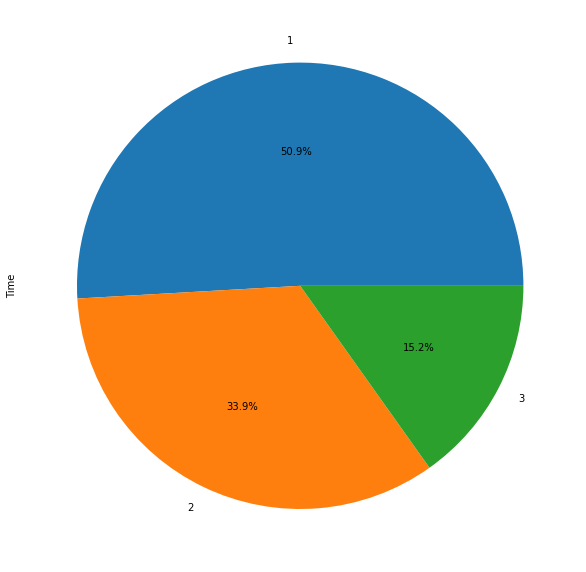

In [10]:
fig = plt.figure(figsize=(10,25))
df2.Time.value_counts().plot(kind = 'pie',autopct='%.1f%%');

## Trağik yoğunluğu artıkça kazalarda cidi bir artış yaşanmakta.

# Kaza oranlarını ne artırır?

### yukarıda göründüğü gibi trafiğü yoğun olması kaza oranını artmasına neden olur.

In [11]:
df.Road_Surface_Conditions.value_counts()

Dry                          1034670
Wet/Damp                      423477
Frost/Ice                      31405
Snow                           10497
Flood (Over 3cm of water)       2143
Name: Road_Surface_Conditions, dtype: int64

## Yol Yüzey Koşulları
#### kazaların nerdeye 2/3'sini kuru 1/3'ni Islak/Nemli yüzey koşularında olmuştur

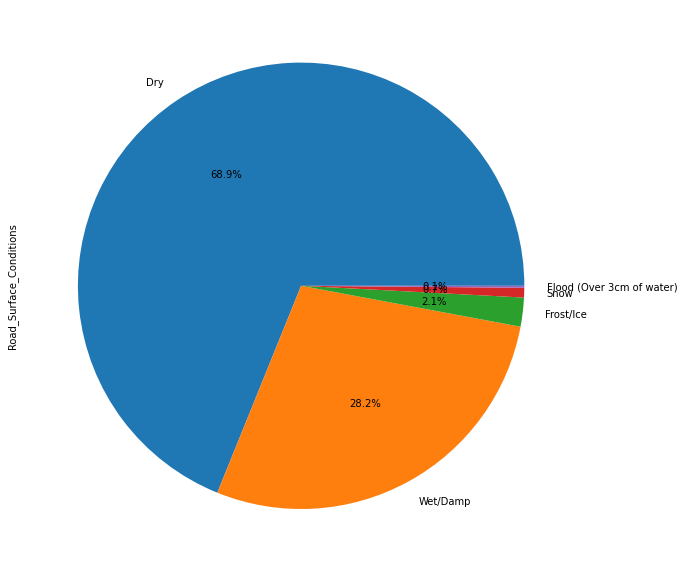

In [12]:
fig = plt.figure(figsize=(10,25))
df.Road_Surface_Conditions.value_counts().plot(kind = 'pie',autopct='%.1f%%');

In [13]:
df.Weather_Conditions.value_counts()

Fine without high winds       1203943
Raining without high winds     177663
Other                           33503
Unknown                         28296
Raining with high winds         20813
Fine with high winds            18355
Snowing without high winds      11301
Fog or mist                      8190
Snowing with high winds          1960
Name: Weather_Conditions, dtype: int64

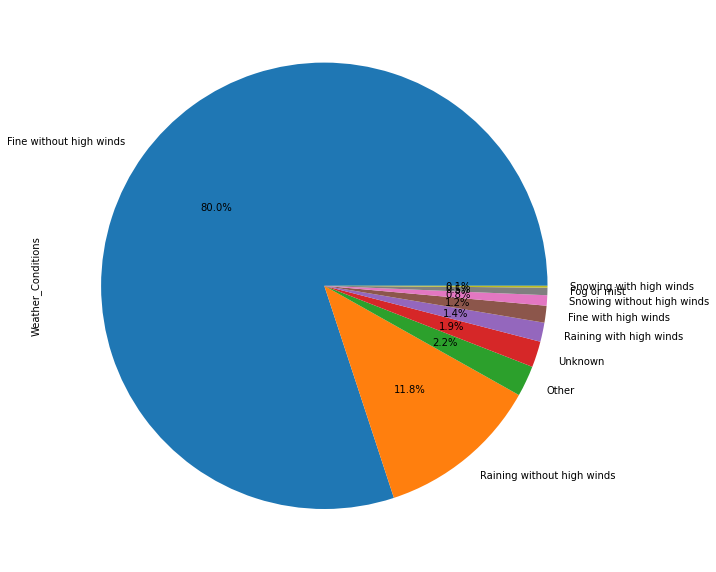

In [14]:
fig = plt.figure(figsize=(10,25))
df.Weather_Conditions.value_counts().plot(kind = 'pie',autopct='%.1f%%');

# Zaman içinde kaza oranlarını tahmin edebilir miyiz?

In [15]:
df.Date.value_counts()

21/10/2005    822
18/11/2005    787
29/09/2006    784
22/09/2006    780
07/12/2005    775
             ... 
25/12/2007    157
02/01/2011    146
25/12/2011    142
10/01/2010    130
25/12/2014    128
Name: Date, Length: 3286, dtype: int64

In [16]:
df["Date"] = df.Date.str[3:]
df["Date"] = df.Date.str[3:]+df.Date.str[:-5]
a = df.Date.value_counts()
dft = pd.DataFrame(a)
dft

,Date
200511,18747
200510,17533
200611,17397
200610,17124
200512,17095
...,...
201012,10345
201303,10284
201301,10226
201304,9962


In [17]:
df3 =  dft.sort_index()
df3

,Date
200501,16278
200502,14521
200503,14977
200504,15661
200505,17032
...,...
201408,12108
201409,11832
201410,13450
201411,13246


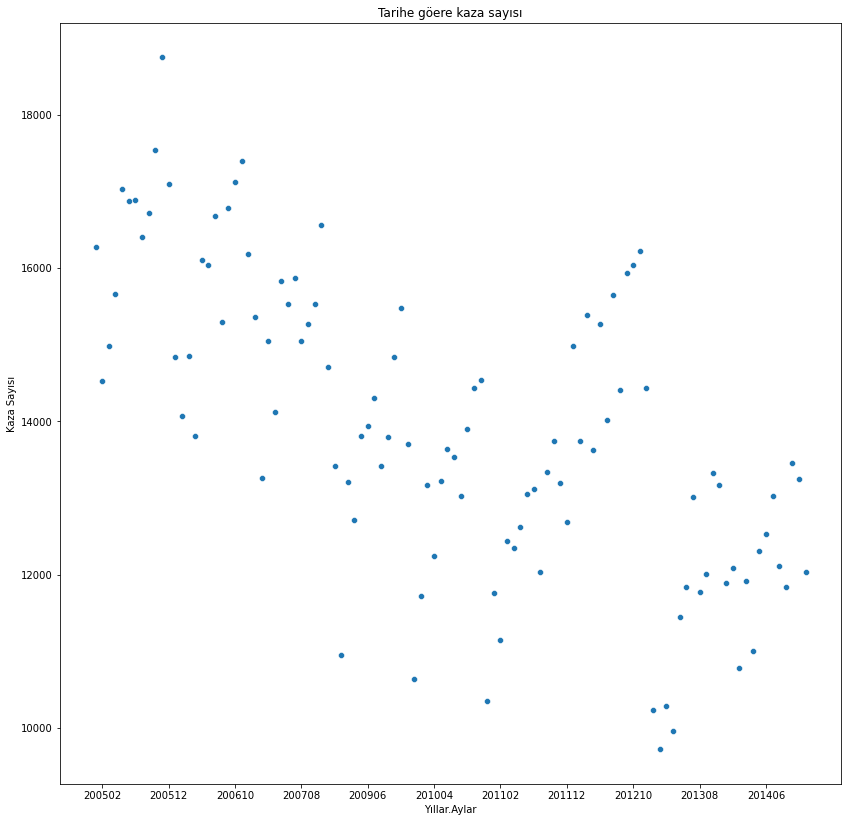

In [18]:
plt.figure(figsize = (14,14))
sns.scatterplot(x = df3.index , y = df3.Date)
plt.xlabel("Yıllar.Aylar")
plt.ylabel("Kaza Sayısı")
plt.title("Tarihe göere kaza sayısı")
plt.xticks(np.arange(1,109,10))
plt.show()

In [19]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [20]:
x = df3.index.values.reshape(-1,1)
y = df3.Date.values.reshape(-1,1)
x = x.astype('int64')


In [21]:
l =np.array([[201502]])# 2015 şubat ayı

### Linear Regression ile tahmin

In [22]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=0)

In [23]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [24]:
reg.score(X_test,y_test)

0.6284076521255059

#### Linear Regression ile tahmin %62 oranında doğru sonuç verir.

In [25]:
reg.predict(l)# Linear Regression ile 2015 şubat ayı kaza sayısı tahmini

array([[11690.03913632]])

### KNN ile tahmin

In [26]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(x,y, test_size=0.20,random_state=0)

In [27]:
knn = KNeighborsRegressor().fit(X_train2, y_train2)

In [28]:
knn.score(X_test2,y_test2)

0.8310287669218744

#### KNN ile tahmin %83 oranında doğru sonuç verir.

In [29]:
knn.predict(l)# KNN ile 2015 şubat ayı kaza sayısı tahmini

array([[12817.2]])

# KNN Parametre

In [30]:
knn_params ={"n_neighbors": np.arange(1,10,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params,cv =10)
knn_cv_model.fit(X_train, y_train)
opt = knn_cv_model.best_params_["n_neighbors"]
print("opt değer", opt)

opt değer 4


In [31]:
knn_tunud = KNeighborsRegressor(n_neighbors=opt)
knn_tunud.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [32]:
knn_tunud.score(X_train,y_train)

0.8245104971873364

# Kırsal ve kentsel alanlar nasıl farklılaştı?

In [33]:
df.Urban_or_Rural_Area.value_counts()

1    972007
2    532011
3       132
Name: Urban_or_Rural_Area, dtype: int64

In [34]:
df.loc[df.Urban_or_Rural_Area ==3 ,"Urban_or_Rural_Area"] = 1

### Şehirde ve Kırsal alanda yapılan kaza orankarı

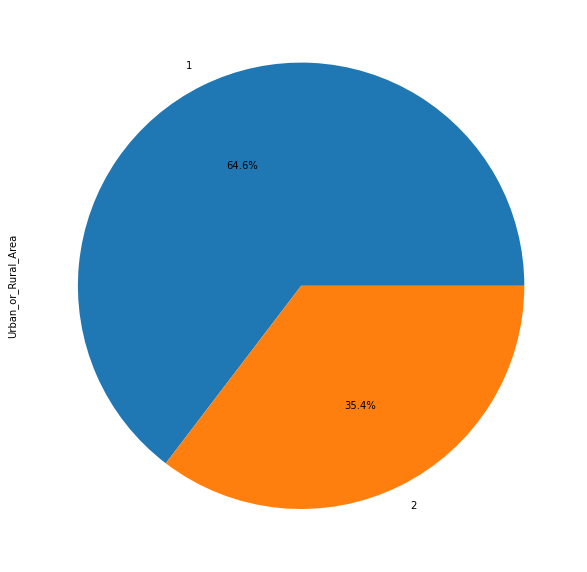

In [35]:
fig = plt.figure(figsize=(10,25))
df.Urban_or_Rural_Area.value_counts().plot(kind = 'pie',autopct='%.1f%%');

Kazalrın %65'i kente %35'i kırsal alanda gerçekleşmiş

In [36]:
Kent = df.loc[df.Urban_or_Rural_Area == 1]
Kirsal = df.loc[df.Urban_or_Rural_Area == 2]

## Kentsel  ve Kırsal alanda yaralı sayısı oranları

Text(0.5, 0, 'Kırsal Alan')

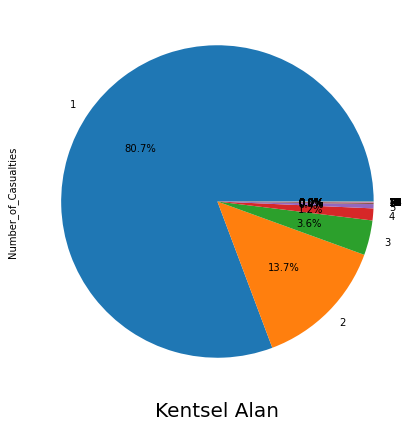

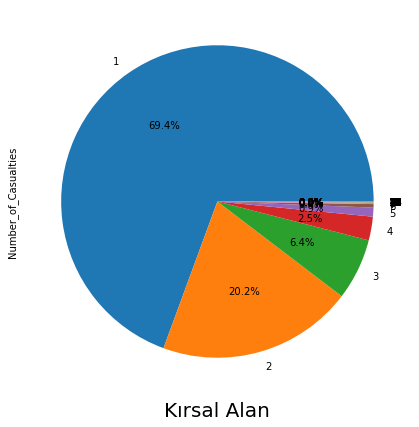

In [37]:
fig = plt.figure(figsize=(7,25))
Kent.Number_of_Casualties.value_counts().plot(kind = 'pie',autopct='%.1f%%');
plt.xlabel("Kentsel Alan", fontsize = 20)

fig = plt.figure(figsize=(7,25))
Kirsal.Number_of_Casualties.value_counts().plot(kind = 'pie',autopct='%.1f%%');
plt.xlabel("Kırsal Alan", fontsize = 20)

Kırsal alanda yapılan kazalarda yaralı sayısında artış yaşanmakta.

## Hız Limiti

Text(0.5, 0, 'Kırsal Alan')

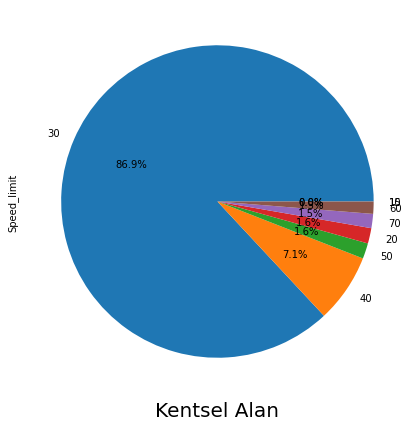

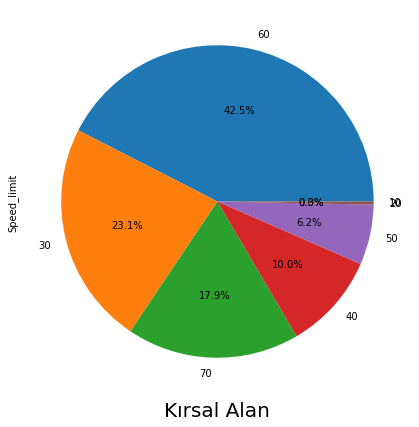

In [38]:
fig = plt.figure(figsize=(7,25))
Kent.Speed_limit.value_counts().plot(kind = 'pie',autopct='%.1f%%');
plt.xlabel("Kentsel Alan", fontsize = 20)

fig = plt.figure(figsize=(7,25))
Kirsal.Speed_limit.value_counts().plot(kind = 'pie',autopct='%.1f%%');
plt.xlabel("Kırsal Alan", fontsize = 20)

Şehirlerde kazaların çoğu düşük hızlarda olurken

Kırsal alanlarda kazalar daha yüksek hızlarda oluyor.

## Yol Yüzey Koşulları

Text(0.5, 0, 'Kırsal Alan')

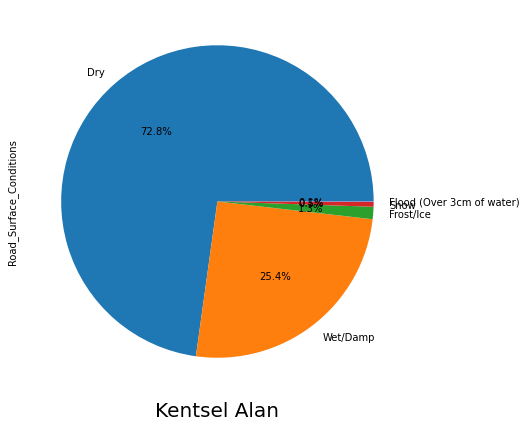

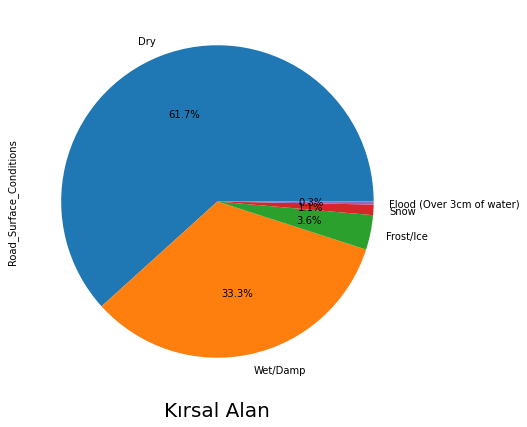

In [39]:
fig = plt.figure(figsize=(7,25))
Kent.Road_Surface_Conditions.value_counts().plot(kind = 'pie',autopct='%.1f%%');
plt.xlabel("Kentsel Alan", fontsize = 20)

fig = plt.figure(figsize=(7,25))
Kirsal.Road_Surface_Conditions.value_counts().plot(kind = 'pie',autopct='%.1f%%');
plt.xlabel("Kırsal Alan", fontsize = 20)

Kırsal alanda şehire göre yol yüzeyi koşulları kazalarda daha etkili olmuş.

## Işık Koşulları

Text(0.5, 0, 'Kırsal Alan')

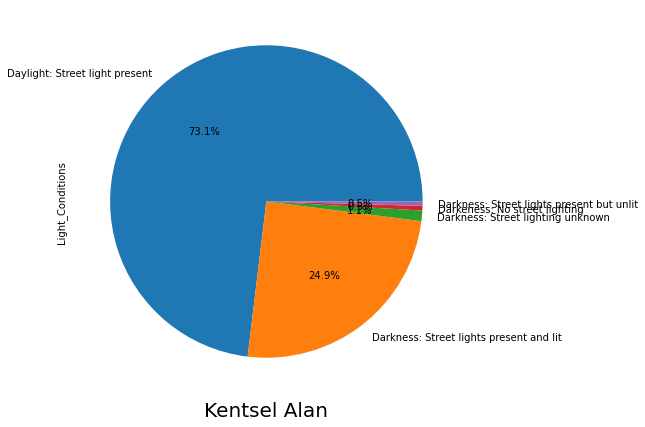

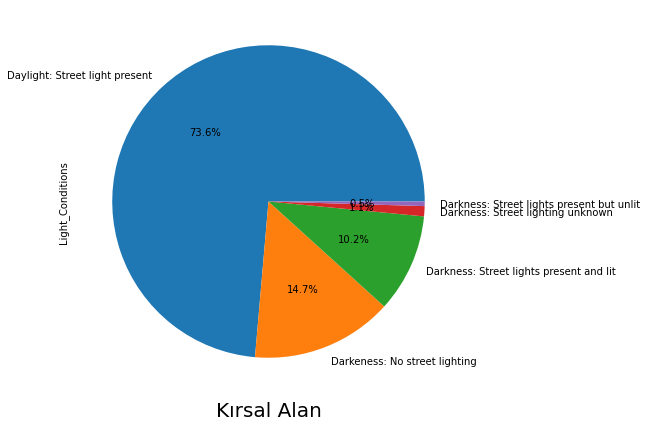

In [40]:
fig = plt.figure(figsize=(7,25))
Kent.Light_Conditions.value_counts().plot(kind = 'pie',autopct='%.1f%%');
plt.xlabel("Kentsel Alan", fontsize = 20)

fig = plt.figure(figsize=(7,25))
Kirsal.Light_Conditions.value_counts().plot(kind = 'pie',autopct='%.1f%%');
plt.xlabel("Kırsal Alan", fontsize = 20)

Şehirde kazalrın %73 gündüz, %25 gece soklaması yanıyor. Sadece %2 karanlıkta olmuş.

Kırsalda ise kazların %15 aydınlatmanın olmadığı yerlerde olmuş.